<a href="https://colab.research.google.com/github/Ahamed070905/Structural-Health-Monitoring/blob/main/STRUCTURALHEALTH_MONITORING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data saved at /content/raw/shm_data.csv
Chunk 1: 10 anomalies detected


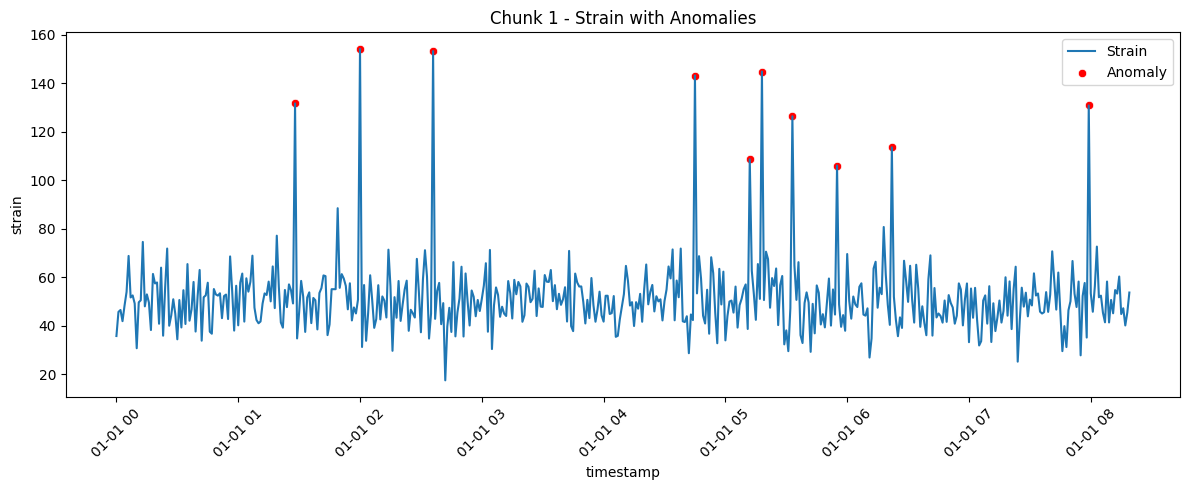

Chunk 2: 10 anomalies detected


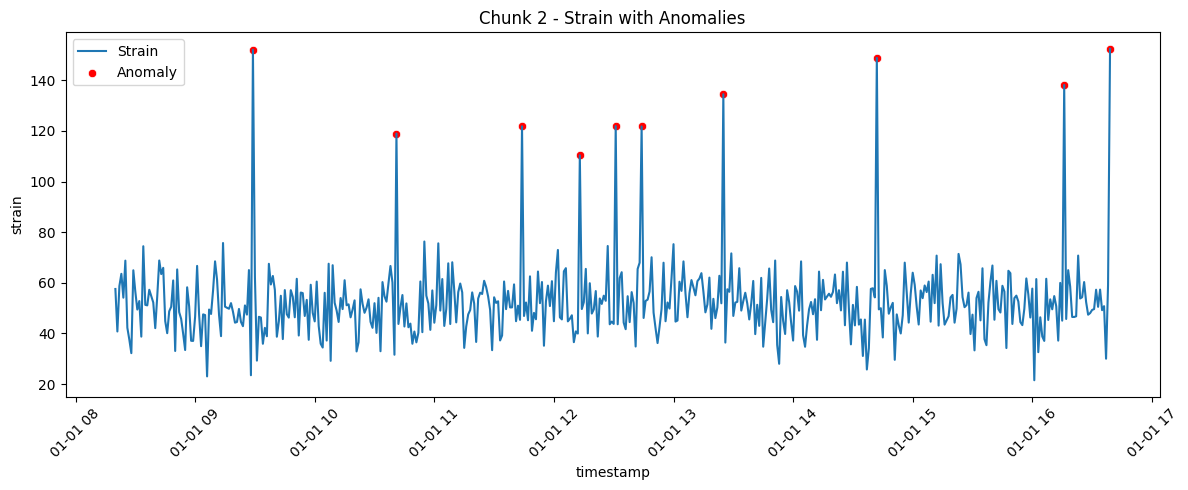

In [2]:
# Structural Health Monitoring - Reduced Output Version for Report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import os
from datetime import datetime

# --------- Setup Paths ----------
BASE_DIR = "/content"
RAW_DIR = os.path.join(BASE_DIR, "raw")
os.makedirs(RAW_DIR, exist_ok=True)
CSV_PATH = os.path.join(RAW_DIR, "shm_data.csv")
CHUNK_SIZE = 500
MAX_CHUNKS = 2  # Limit for concise output

# --------- Generate Synthetic Data ----------
def generate_data(filepath, rows=1000):
    timestamps = pd.date_range(start="2023-01-01", periods=rows, freq="1min")
    df = pd.DataFrame({
        "timestamp": timestamps,
        "strain": np.random.normal(50, 10, rows),
        "vibration": np.random.normal(0.3, 0.1, rows),
        "displacement": np.random.normal(5, 2, rows),
        "temperature": np.random.normal(30, 3, rows),
    })

    anomalies = np.random.choice(rows, size=20, replace=False)
    df.loc[anomalies, 'strain'] += np.random.normal(80, 15, len(anomalies))
    df.loc[anomalies, 'vibration'] += np.random.normal(1.5, 0.3, len(anomalies))

    df.to_csv(filepath, index=False)
    print(f"Data saved at {filepath}")

# --------- Read Data in Chunks ----------
def read_chunks(path, chunk_size):
    return pd.read_csv(path, chunksize=chunk_size, parse_dates=["timestamp"])

# --------- Detect Anomalies ----------
def detect_anomalies(df):
    features = ["strain", "vibration", "displacement", "temperature"]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features])
    model = IsolationForest(contamination=0.02, random_state=42)
    df['anomaly'] = model.fit_predict(X_scaled)
    return df[df['anomaly'] == -1]

# --------- Plot One Graph Only ----------
def plot_anomalies(df, anomalies, chunk_num):
    plt.figure(figsize=(12, 5))
    sns.lineplot(x='timestamp', y='strain', data=df, label='Strain')
    if not anomalies.empty:
        sns.scatterplot(x='timestamp', y='strain', data=anomalies, color='red', label='Anomaly')
    plt.title(f"Chunk {chunk_num} - Strain with Anomalies")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# --------- Main SHM Function ----------
def monitor_shm():
    if not os.path.exists(CSV_PATH):
        generate_data(CSV_PATH)

    for i, chunk in enumerate(read_chunks(CSV_PATH, CHUNK_SIZE)):
        if i >= MAX_CHUNKS:
            break
        anomalies = detect_anomalies(chunk)
        print(f"Chunk {i+1}: {len(anomalies)} anomalies detected")
        plot_anomalies(chunk, anomalies, i+1)

monitor_shm()